# Pymaceuticals Analysis

## Overview and Objective

Pymaceuticals Inc. is a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

We have been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. 

Our objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

As part of the analysis we need to do the following:
* Create a scatter plot that shows how the tumor volume changes over time for each treatment.
* Create a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
* Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


## Observations:

Amongst the 4 drugs in question - Capomulin, Infubinol, Ketapril, and Placebo, Capomulin seems to give better results than the other three. 

### Observed Trend 1
The Tumor Volume decreases over time with the use of the drug Capomulin. The Tumor Volume increases over time for the other three drugs - Infubinol, Ketapril, and Placebo

### Observed Trend 2
The rate of increase of Metastatic sites in lowest with the use of Capomulin and highest with Placebo.

### Observed Trend 3
The survival rate of mice is higher in those treated with Capomulin and was lower in those treated with Infubinol, Ketapril, and Placebo

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy.stats import sem
import warnings

In [298]:
trial_df = pd.read_csv('raw_data/clinicaltrial_data.csv')
mouse_df = pd.read_csv('raw_data/mouse_drug_data.csv')

In [299]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [300]:
mouse_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [301]:
# Select Data only for the four drugs that we want to analyze, 
# Combine the two data frames to get a single data frame with only the 4 drugs' data 
four_drugs_df = mouse_df.loc[(mouse_df['Drug']=='Capomulin') | (mouse_df['Drug']=='Infubinol') | (mouse_df['Drug']=='Ketapril') | (mouse_df['Drug']=='Placebo'), :]
full_df = pd.merge(trial_df, four_drugs_df, on='Mouse ID')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 5 columns):
Mouse ID              777 non-null object
Timepoint             777 non-null int64
Tumor Volume (mm3)    777 non-null float64
Metastatic Sites      777 non-null int64
Drug                  777 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 36.4+ KB


## Plots that show how the tumor volume changes over time for each treatment.



In [302]:
drugs = full_df['Drug'].unique()
drugs

array(['Capomulin', 'Ketapril', 'Infubinol', 'Placebo'], dtype=object)

### Scatter plots - one for each Drug compared against each other show how the Tumor Volume of all the mice for that drug progress over time

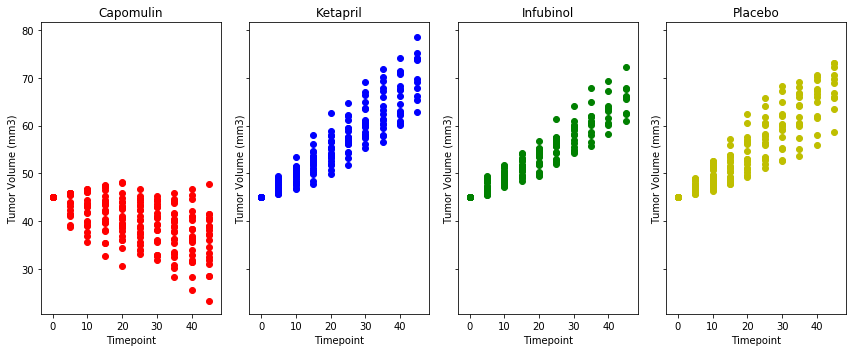

In [306]:
# Create subplots to plot data for each of the 4 drugs to compare
fig, axes = plt.subplots(1, 4, figsize=(12,5), sharex=True, sharey=True)

# List of colors for the subplots
colors = ['r', 'b', 'g', 'y']

# loop through the list of Drugs get the data set for each drug and plor it on a separate axes
for i in range(len(drugs)) :
    drug_df = full_df[full_df['Drug']==drugs[i]]
    axes[i].scatter(x=drug_df['Timepoint'], y=drug_df['Tumor Volume (mm3)'], c=colors[i])
    axes[i].set_title(drugs[i])
    axes[i].set_xlabel("Timepoint")
    axes[i].set_ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

### Scatter plot showing one plot with data for all drugs

In [307]:
# Group the data for mice and get the mean values for the results to compare
full_grp_df = full_df.groupby(['Drug','Timepoint'], as_index=False).mean()

# Calculate the errorbar values using the sem() function.
sem_grp_df = full_df.groupby(['Drug','Timepoint']).sem()
sem_grp_df.reset_index(inplace=True)
# Drop unwanted columns as we only want the errorbar values. Rename the errorbar values
sem_grp_df.drop(['Mouse ID', 'Timepoint', 'Drug'], axis=1, inplace=True)
sem_grp_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) SEM',
                          'Metastatic Sites': 'Metastatic Sites SEM'}, inplace=True)

# Merge the errorbar values with the original data to get a new table with all values
sem_grp_df = pd.merge(full_grp_df, sem_grp_df, left_index=True, right_index=True)
sem_grp_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Metastatic Sites SEM,Tumor Volume (mm3) SEM
0,Capomulin,0,45.000000,0.000000,0.000000,0.000000
1,Capomulin,5,44.266086,0.160000,0.074833,0.448593
2,Capomulin,10,43.084291,0.320000,0.125433,0.702684
3,Capomulin,15,42.064317,0.375000,0.132048,0.838617
4,Capomulin,20,40.716325,0.652174,0.161621,0.909731


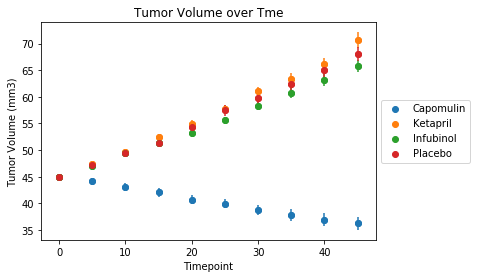

In [308]:
# Setting up the plot
fig, ax = plt.subplots()

# loop through the drugs and plor the scatter graph and error bars for each drug
for i in range(len(drugs)) :
    drug_sem_df = sem_grp_df[sem_grp_df['Drug']==drugs[i]]
    ax.scatter(x=drug_sem_df['Timepoint'], y=drug_sem_df['Tumor Volume (mm3)'])
    ax.errorbar(drug_sem_df['Timepoint'], drug_sem_df['Tumor Volume (mm3)'], drug_sem_df['Tumor Volume (mm3) SEM'], fmt="o")

# Set the other attributes for the plot
ax.legend(drugs, loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('Tumor Volume over Tme')
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

### Line graph showing one plot with data for all drugs

In [309]:
# Create a pivot table for the Tumor Volume data for all Drugs for all Timepoints
drug_pivot_df = full_grp_df.pivot(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')
drug_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


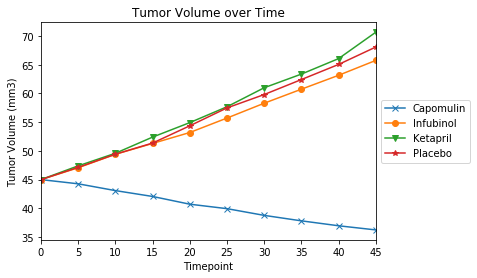

In [310]:
# Create a line graph from the pivot table to show the progression
g =drug_pivot_df.plot(kind='line', title="Tumor Volume over Time")
g.set_ylabel('Tumor Volume (mm3)')

# Set the markers
drug_markers =  ['x','o','v','*']
for i, line in enumerate(g.get_lines()):
    line.set_marker(drug_markers[i])
    
# Set the legend to be outside the plot
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Plots that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.


### Scatter Plot showing the change in Metastatic Sites over Time

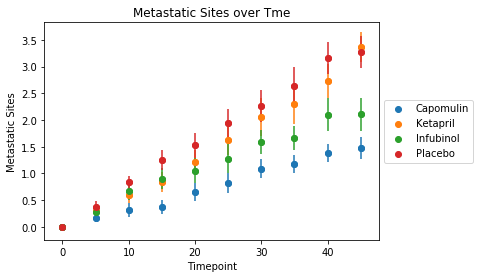

In [311]:
# Setting up the plot
fig, ax = plt.subplots()

# loop through the drugs and plor the scatter graph and error bars for each drug
for i in range(len(drugs)) :
    drug_sem_df = sem_grp_df[sem_grp_df['Drug']==drugs[i]]
    ax.scatter(x=drug_sem_df['Timepoint'], y=drug_sem_df['Metastatic Sites'])
    ax.errorbar(drug_sem_df['Timepoint'], drug_sem_df['Metastatic Sites'], drug_sem_df['Metastatic Sites SEM'], fmt="o")

# Set the other attributes for the plot
ax.legend(drugs, loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('Metastatic Sites over Tme')
ax.set_xlabel("Timepoint")
ax.set_ylabel("Metastatic Sites")
plt.show()

### Line Graph showing the change in Metastatic Sites over Time

In [312]:
# Create a pivot table for the Metastatic Sites data
drug_pivot_df = full_grp_df.pivot(index='Timepoint', columns='Drug',values='Metastatic Sites')
drug_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


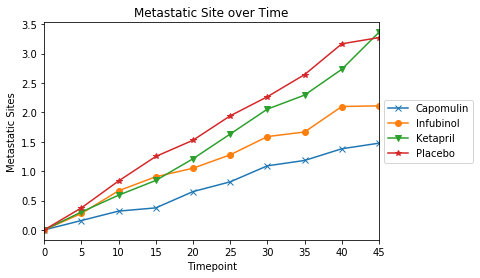

In [313]:
# Plot the line graph
g =drug_pivot_df.plot(kind='line', title="Metastatic Site over Time")
g.set_ylabel('Metastatic Sites')

# Set the markers
for i, line in enumerate(g.get_lines()):
    line.set_marker(my_markers[i])
    
# Set the legend to be outside the plot
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


## Scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)


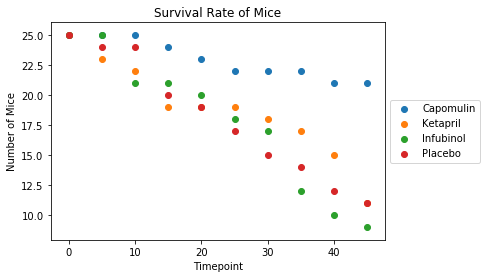

In [314]:
# Ge the count of mice at each timepoint for each drug
alive_grp_df = full_df.groupby(['Drug','Timepoint'], as_index=False).count()[['Drug','Timepoint', 'Mouse ID']]

# Setting up the plot
fig, ax = plt.subplots()

# loop through the drugs and plor the scatter graph and error bars for each drug
for i in range(len(drugs)) :
    drug_alive_df = alive_grp_df[alive_grp_df['Drug']==drugs[i]]
    
    ax.scatter(x=drug_alive_df['Timepoint'], y=drug_alive_df['Mouse ID'])

# Set the other attributes for the plot
ax.legend(drugs, loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('Survival Rate of Mice')
ax.set_xlabel("Timepoint")
ax.set_ylabel("Number of Mice")
plt.show()

### Line graph showing the Survival Rate of mice

In [315]:
# Create a pivot table for the Survival Rate
drug_pivot_df = alive_grp_df.pivot(index='Timepoint', columns='Drug',values='Mouse ID')
drug_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


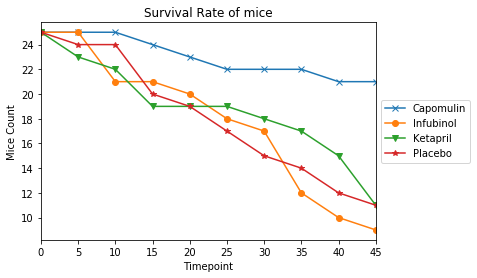

In [316]:
# Plot the line graph
g =drug_pivot_df.plot(kind='line', title="Survival Rate of mice")
g.set_ylabel('Mice Count')

# Set the markers
for i, line in enumerate(g.get_lines()):
    line.set_marker(my_markers[i])
    
# Set the legend to be outside the plot
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



## Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [317]:
# A function that takes the container of the bar plot and the axes and 
# adds the Y values as labels to the bars
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')


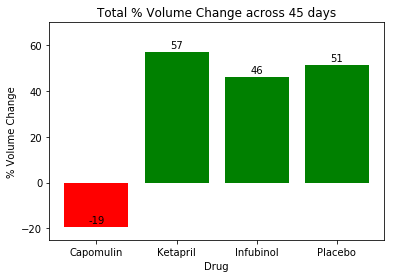

In [331]:
# Create an empty dictionary to store the % Volume change for each drug
changes = {}


# go through the full table for each drug we want and get the Tumor Volume at 
# Timepoints 0 and 45. Then calculate the % Volume change
for drug in drugs :
    start_vol = full_grp_df.loc[(full_grp_df['Drug'] == drug) & (full_grp_df['Timepoint'] == 0), ['Tumor Volume (mm3)']]
    end_vol = full_grp_df.loc[(full_grp_df['Drug'] == drug) & (full_grp_df['Timepoint'] == 45), ['Tumor Volume (mm3)']]
    
    percent_change = ((end_vol.iloc[0,0]-start_vol.iloc[0,0])/start_vol.iloc[0,0])*100
    changes[drug]=percent_change

g = plt.bar(x=[1,2,3,4], height=list(changes.values()), align='center', tick_label=list(changes.keys()),
             color=['g' if v >=0 else 'r' for v in changes.values()])

# set the Y limits
ymin = min(list(changes.values()))
ymax = max(list(changes.values()))
plt.ylim(-25,70)

# set the titles
plt.title("Total % Volume Change across 45 days")
plt.xlabel("Drug")
plt.ylabel("% Volume Change")

# Set the labels on the bars
autolabel(g, plt.axes())

#Ignore the warning 
warnings.filterwarnings('ignore')

plt.show()
